# Text Prediction With LSTM

The model will predict the next n words of a movie title given a starting word, using Long Short Term Memory.

###imports

In [96]:
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical

### loading data

The dataset contains information about around 5000 movies

In [97]:
df = pd.read_csv('/content/tmdb_5000_movies.csv')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


### Extracting Names

We only need the titles of movies to train our dataset to extracting that

In [98]:
df = df['original_title']
df.head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

### Converting Movie Names to List

In [99]:
movie_names = df.to_list()
movie_names

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [100]:
len(movie_names)


4803

### Coverting Data to Lower Case

In [101]:
def lower(movies):
  names_lower = []
  for name in movies:
    names_lower = [name.lower() for name in movies]
  return(names_lower)

In [102]:
movies = (lower(movie_names))
type(movies)

list

### Converting Text to Numbers(tokenization)

As the model can only feed on numerical data, we need to convert our textual data to numeric using tokenization. Tokenization assigns a unique number to very unique word in the data. Using Keras for the mentioned task

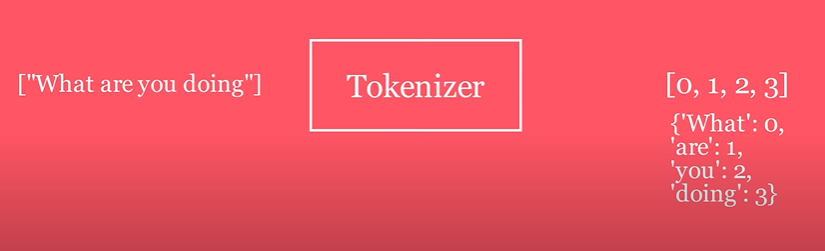

In [103]:
from keras.preprocessing.text import Tokenizer

In [104]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(movies)
sequences = tokenizer.texts_to_sequences(movies)

In [105]:
print(movies[0], " --> seq:", sequences[0])
print(movies[1], " --> seq:", sequences[1])

avatar  --> seq: [1564]
pirates of the caribbean: at world's end  --> seq: [210, 2, 1, 431, 47, 432, 72]


In [106]:
tokenizer.word_counts

OrderedDict([('avatar', 1),
             ('pirates', 7),
             ('of', 433),
             ('the', 1420),
             ('caribbean', 4),
             ('at', 20),
             ("world's", 4),
             ('end', 15),
             ('spectre', 1),
             ('dark', 19),
             ('knight', 7),
             ('rises', 1),
             ('john', 7),
             ('carter', 3),
             ('spider', 7),
             ('man', 71),
             ('3', 30),
             ('tangled', 1),
             ('avengers', 2),
             ('age', 9),
             ('ultron', 1),
             ('harry', 11),
             ('potter', 7),
             ('and', 127),
             ('half', 4),
             ('blood', 19),
             ('prince', 9),
             ('batman', 8),
             ('v', 5),
             ('superman', 6),
             ('dawn', 13),
             ('justice', 2),
             ('returns', 4),
             ('quantum', 1),
             ('solace', 1),
             ('dead', 40),
        

In [107]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'and': 4,
 'in': 5,
 '2': 6,
 'to': 7,
 'man': 8,
 'i': 9,
 'love': 10,
 'with': 11,
 'on': 12,
 'me': 13,
 'my': 14,
 'movie': 15,
 'you': 16,
 'dead': 17,
 'last': 18,
 'for': 19,
 'from': 20,
 '3': 21,
 'good': 22,
 'big': 23,
 'day': 24,
 'house': 25,
 'ii': 26,
 'american': 27,
 'men': 28,
 'it': 29,
 'story': 30,
 'life': 31,
 'black': 32,
 'girl': 33,
 'all': 34,
 'out': 35,
 'time': 36,
 'night': 37,
 'is': 38,
 'world': 39,
 'days': 40,
 'star': 41,
 'part': 42,
 'new': 43,
 'de': 44,
 'little': 45,
 'la': 46,
 'at': 47,
 'up': 48,
 'an': 49,
 'die': 50,
 'city': 51,
 'dark': 52,
 'blood': 53,
 'game': 54,
 'one': 55,
 'red': 56,
 'blue': 57,
 'your': 58,
 'iii': 59,
 'kill': 60,
 'war': 61,
 'white': 62,
 'street': 63,
 'lost': 64,
 'christmas': 65,
 'legend': 66,
 'wild': 67,
 'how': 68,
 'road': 69,
 'boys': 70,
 'high': 71,
 'end': 72,
 'down': 73,
 'home': 74,
 'hard': 75,
 'boy': 76,
 'year': 77,
 'like': 78,
 'x': 79,
 'bad': 80,
 'do': 81

### Preparing X and y Labels

Now we need to label our data. For that purpose we are gonna drop movie titles with single word names and for the rest of the titles we will loop through each word and labelling the last word as y.

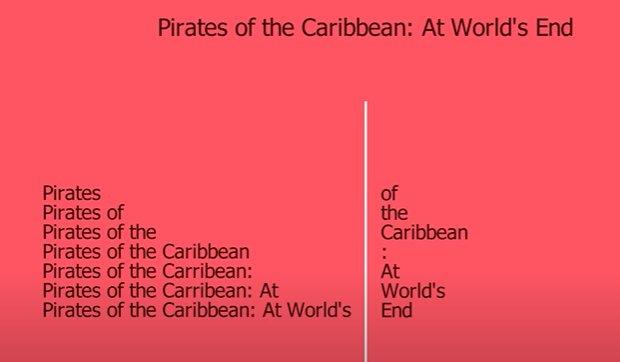

In [108]:
X = []
y = []
total_words_dropped = 0

for i in sequences:
    if len(i) > 1:
        for index in range(1, len(i)):
            X.append(i[:index])
            y.append(i[index])
    else:
        total_words_dropped += 1

print("Total Single Words Dropped are:", total_words_dropped)

Total Single Words Dropped are: 1003


In [109]:
X[:7]

[[210],
 [210, 2],
 [210, 2, 1],
 [210, 2, 1, 431],
 [210, 2, 1, 431, 47],
 [210, 2, 1, 431, 47, 432],
 [1]]

In [110]:
y[:7]

[2, 1, 431, 47, 432, 72, 52]

### converting X to matrix of equal sizes

CLeaning data to be properly fed to the model

In [111]:

X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [112]:
X

array([[  0,   0,   0, ...,   0,   0, 210],
       [  0,   0,   0, ...,   0, 210,   2],
       [  0,   0,   0, ..., 210,   2,   1],
       ...,
       [  0,   0,   0, ...,   0,   0,  14],
       [  0,   0,   0, ...,   0,  14, 300],
       [  0,   0,   0, ...,  14, 300,  11]], dtype=int32)

### one hot encoding on y

In [114]:

y = to_categorical(y)
y.shape

(8483, 5045)

In [115]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [116]:
vocab_size = len(tokenizer.word_index) + 1

### Preparing Model

Using the following layers of the sequential model: Dense,LSTM,Embedding.<br>
->Embedding Layer : Turns positive integers (indexes) into dense vectors of fixed size.
e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]<br>
Arguments of Embedding Layer used : 
1. input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
2. output_dim: Integer. Dimension of the dense embedding.

-> LSTM Layer : Long Short Term Memory Model
<br>Arguments of LSTM  Layer used :
1. units : Positive integer, number of nuerons in model
2. return_sequences : Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.

-> Dense Layer : Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). 
<br>Arguments of LSTM  Layer used :
1. units: Positive integer, dimensionality of the output space.
2. activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x). We are using Relu( g(z) = max{0, z} ) and softmax activation functions.


<br><br>

To compile the model we used following parameters:<br>
1. Crossentropy to calculate the loss
2. Adam algorithm as the optimizer to upgate weights
3. Accuracy as the metric to decide how good the model is

In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [122]:
def create_model(vocabulary_size):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 14))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))

    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), metrics=['accuracy'])
   
    model.summary()
    
    return model

In [123]:
model = create_model(vocab_size)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 14)          70630     
                                                                 
 lstm_4 (LSTM)               (None, None, 100)         46000     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 5045)              509545    
                                                                 
Total params: 716,675
Trainable params: 716,675
Non-trainable params: 0
_________________________________________________________________


### Training Model

The model was first trained on 100 epoch and default leaning rate of adam optimizer giving accuracy of around 30 percent. On changing the epochs to 150 the accuracy increased to 35 percent. The changing the learning rate of adam optimizer to 0.004(after a few tries) the accuracy increased upto 63 percent

In [124]:
model.fit(X, y,epochs=150,verbose=1)

Epoch 1/150
266/266 [==============================] - 13s 35ms/step - loss: 7.6405 - accuracy: 0.0575
Epoch 2/150
266/266 [==============================] - 9s 35ms/step - loss: 7.0368 - accuracy: 0.0639
Epoch 3/150
266/266 [==============================] - 9s 34ms/step - loss: 6.8390 - accuracy: 0.0754
Epoch 4/150
266/266 [==============================] - 9s 34ms/step - loss: 6.6390 - accuracy: 0.0925
Epoch 5/150
266/266 [==============================] - 9s 34ms/step - loss: 6.5043 - accuracy: 0.0981
Epoch 6/150
266/266 [==============================] - 9s 34ms/step - loss: 6.4076 - accuracy: 0.1036
Epoch 7/150
266/266 [==============================] - 9s 34ms/step - loss: 6.3167 - accuracy: 0.1059
Epoch 8/150
266/266 [==============================] - 9s 34ms/step - loss: 6.2294 - accuracy: 0.1086
Epoch 9/150
266/266 [==============================] - 9s 34ms/step - loss: 6.1214 - accuracy: 0.1088
Epoch 10/150
266/266 [==============================] - 9s 34ms/step - loss: 6.00

### Making Predictions

In [125]:
vocab_array = np.array(list(tokenizer.word_index.keys()))

In [128]:
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        text += " " + prediction
    return text

In [129]:
make_prediction("cloudy", 5)

1/1 [==============================] - 0s 19ms/step


'cloudy with a chance of meatballs'

In [130]:
make_prediction("harry", 5)

1/1 [==============================] - 0s 27ms/step


'harry potter and the half blood'

In [135]:
make_prediction("Dark Knight", 1)

1/1 [==============================] - 0s 26ms/step


'Dark Knight nights'